In [1]:
import torch
import torch.nn as nn
import sys
import nltk
import torch.nn.functional as F
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
nltk.download('punkt')
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
sys.path.insert(0, '..')
import pickle
from torch.autograd import grad as torch_grad

word_embedding_dim = 50
z_size = 100
output_shape = (1, 105, 8)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gxb18167\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
print(torch.__version__)
print("GPU Available:", torch.cuda.is_available())

if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = "cpu"

2.0.1
GPU Available: False


In [3]:
class Generator(nn.Module):
    def __init__(self, noise_dim, word_embedding_dim, output_shape):
        super(Generator, self).__init__()

        self.noise_dim = noise_dim
        self.word_embedding_dim = word_embedding_dim

        # Define the layers of your generator
        self.fc_noise = nn.Linear(noise_dim, 105*8)  # Increase the size for more complexity
        self.fc_word_embedding = nn.Linear(word_embedding_dim, 105*8)  # Increase the size for more complexity
        self.conv1 = nn.Conv2d(2, 128, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.relu = nn.LeakyReLU(0.2)

        self.conv2 = nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1)
        self.tanh = nn.Tanh()

    def forward(self, noise, word_embedding):
        # Process noise
        noise = self.fc_noise(noise)
        noise = noise.view(noise.size(0), 1, 105,8)  # Adjust the size to match conv1

        # Process word embedding
        word_embedding = self.fc_word_embedding(word_embedding.to(device))
        word_embedding = word_embedding.view(word_embedding.size(0), 1, 105, 8)  # Adjust the size to match conv1

        # Concatenate noise and word embedding
        combined_input = torch.cat([noise, word_embedding], dim=1)

        # Upsample and generate the output
        z = self.conv1(combined_input)
        z = self.bn1(z)
        z = self.relu(z)

        z = self.conv2(z)
        z = self.bn2(z)
        z = self.relu(z)

        z = self.conv3(z)
        z = self.tanh(z)

        return z

In [13]:
# Assuming gen_model is the generator model you used during training
gen_model = Generator(z_size, word_embedding_dim, output_shape)  # Replace with your actual generator model class

d_losses_list = []
g_losses_list = []
#range 5 to 100 every 5
for x in range(5, 100, 5):
    # Load the checkpoint file
    checkpoint = torch.load(r"I:\Science\CIS-YASHMOSH\niallmcguire\WGAN_2.0\checkpoint_epoch_" + str(x) + ".pt",
                            map_location=torch.device('cpu'))  # Load the final model checkpoint

    d_losses = checkpoint['d_losses']
    g_losses = checkpoint['g_losses']

    d_losses_list.append(d_losses)
    g_losses_list.append(g_losses)




In [14]:
d_losses = []
g_losses = []

for x in d_losses_list:
    for i in x:
        d_losses.append(i)
for x in g_losses_list:
    for i in x:
        g_losses.append(i)

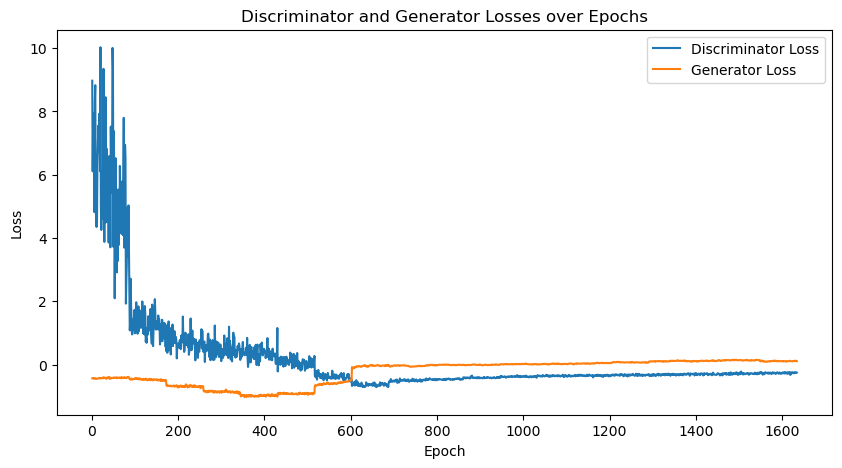

In [15]:
# You can also plot the losses over epochs using a plotting library like matplotlib
import matplotlib.pyplot as plt

# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(d_losses) + 1), d_losses, label='Discriminator Loss')
plt.plot(range(1, len(g_losses) + 1), g_losses, label='Generator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Discriminator and Generator Losses over Epochs')
plt.legend()
plt.show()

In [16]:
g_losses

[-0.4318296015262604,
 -0.42776352167129517,
 -0.42251265048980713,
 -0.4250165820121765,
 -0.4492286145687103,
 -0.43570247292518616,
 -0.43085819482803345,
 -0.43180522322654724,
 -0.44561684131622314,
 -0.4497041702270508,
 -0.4393036365509033,
 -0.4427174925804138,
 -0.4403148293495178,
 -0.44161665439605713,
 -0.42977869510650635,
 -0.43103015422821045,
 -0.4209456741809845,
 -0.432483971118927,
 -0.425873339176178,
 -0.4202706813812256,
 -0.43226340413093567,
 -0.4197247624397278,
 -0.423520028591156,
 -0.4288637638092041,
 -0.40991878509521484,
 -0.4100702404975891,
 -0.4310166835784912,
 -0.40233808755874634,
 -0.42072397470474243,
 -0.4138883054256439,
 -0.4160628020763397,
 -0.43402010202407837,
 -0.4288780987262726,
 -0.4427264332771301,
 -0.41722968220710754,
 -0.4008904695510864,
 -0.39847511053085327,
 -0.4107770025730133,
 -0.41735363006591797,
 -0.3990180492401123,
 -0.4473956227302551,
 -0.40484875440597534,
 -0.4324451684951782,
 -0.43059635162353516,
 -0.434948265552